In [3]:
import tensorflow as tf
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Concatenate,UpSampling2D,Dropout,Input,AveragePooling2D
from tensorflow.keras.metrics import Precision,Recall
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.metrics import Accuracy,Precision , Recall
from sklearn.model_selection import train_test_split
import numpy as np 
import matplotlib.pyplot as plt

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [21]:
def deeplabv3(input_size):
    input_scan = Input(input_size)
    x  = Conv2D(32,(3,3),padding="same",activation="relu")(input_scan)
    #block 2
    x_1 =MaxPooling2D((2,2),strides=2)(x)
    x_1  = Conv2D(64,(3,3),padding="same",activation="relu")(x_1)
   
    #block 3
    x_2 =MaxPooling2D((2,2),strides=2)(x_1)
    x_2  = Conv2D(128,(3,3),padding="same",activation="relu")(x_2)
    #block 4
    x_3 =MaxPooling2D((2,2),strides=2)(x_2)
    x_3  = Conv2D(256,(3,3),padding="same",activation="relu")(x_3)
    #block 5
    x_4 =MaxPooling2D((2,2),strides=2)(x_3)
    x_4  = Conv2D(512,(3,3),padding="same",activation="relu")(x_4)
    #atrousconv
    y_pool = AveragePooling2D((x_4.shape[1], x_4.shape[2]))(x_4)
    y_pool = Conv2D(128, 1, padding='same',activation="relu")(y_pool)
    y_pool = UpSampling2D((x_4.shape[1], x_4.shape[2]))(y_pool)
    y_1 = Conv2D(128, 3, dilation_rate=1, padding='same', activation="relu")(x_4)
    y_2 = Conv2D(128, 3, dilation_rate=6, padding='same', activation="relu")(x_4)
    y_3 = Conv2D(128, 3, dilation_rate=12, padding='same', activation="relu")(x_4)
    y_4 = Conv2D(128, 3, dilation_rate=18, padding='same', activation="relu")(x_4)
    y = Concatenate()([y_pool,  y_1, y_2, y_3,y_4])
    y = Conv2D(128,1,  padding='same',activation="relu")(y)
    x_a = UpSampling2D((4, 4))(y)
    x_b = Conv2D(48,1,  padding='same',activation="relu")(x_2)
    out = Concatenate()([x_a,x_b])
    out = Conv2D(128,3,  padding='same',activation="relu")(out)
    out = Conv2D(256,3,  padding='same',activation="relu")(out)
    out = UpSampling2D((4, 4))(out)
    out_layer = Conv2D(1,1,  padding='same',activation="sigmoid")(out)
    model = tf.keras.Model(input_scan,out_layer,name='deeplabv3')
    return model

In [22]:
model = deeplabv3((512,512,1))

In [23]:
model.summary()

Model: "deeplabv3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 512, 512, 1  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_14 (Conv2D)             (None, 512, 512, 32  320         ['input_2[0][0]']                
                                )                                                                 
                                                                                                  
 max_pooling2d_4 (MaxPooling2D)  (None, 256, 256, 32  0          ['conv2d_14[0][0]']              
                                )                                                         

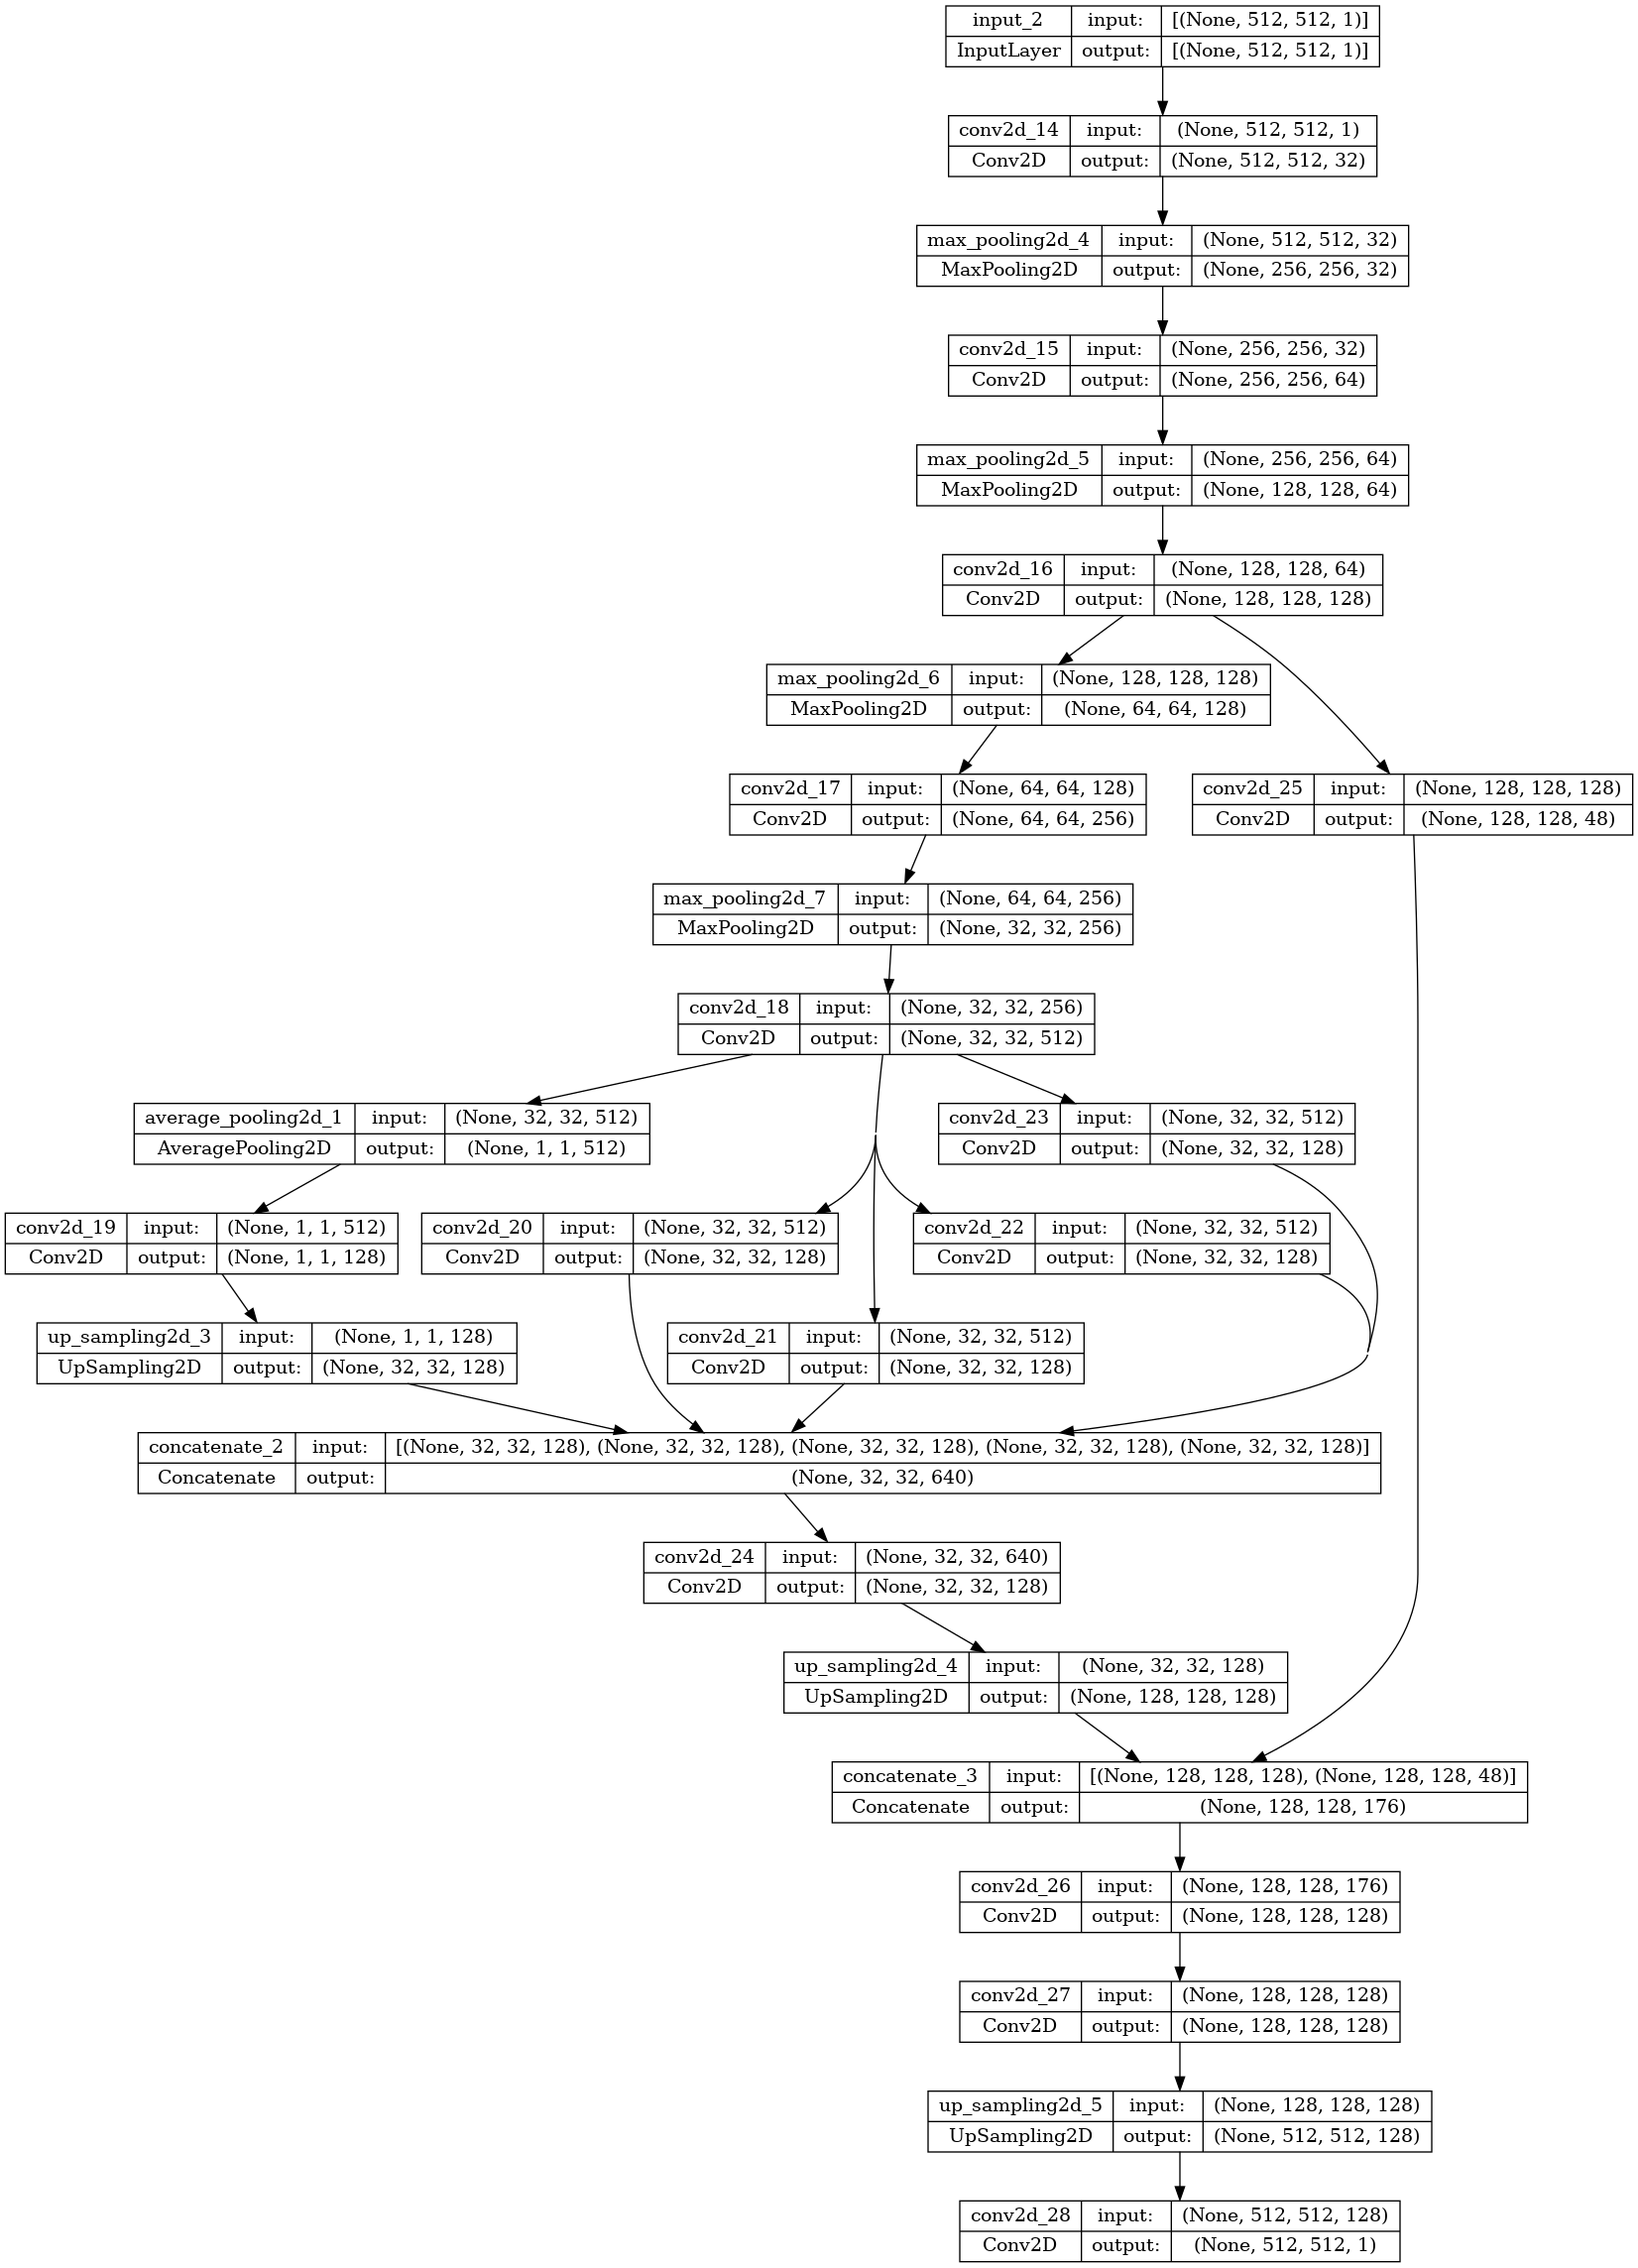

In [24]:
from tensorflow.keras.utils import plot_model
plot_model(model, show_shapes=True, rankdir='TB',
to_file='model_cifar10.png')

In [8]:
X = np.load("/kaggle/input/data12/X1.npy")
Y = np.load("/kaggle/input/data12/mask.npy")

In [9]:
X = X/255

In [10]:
Xtrain,Xtest,Ytrain,Ytest = train_test_split(X,Y,test_size =0.1,random_state=48)

In [25]:
model.compile(optimizer = Adam(learning_rate=0.0001),loss = "BinaryCrossentropy",metrics=["accuracy"])

In [26]:
hist = model.fit(Xtrain,Ytrain,epochs=50,batch_size=16,validation_data=(Xtest,Ytest))

Epoch 1/50
67/67 [==============================] - 29s 328ms/step - loss: 0.1110 - accuracy: 0.9850 - val_loss: 0.0073 - val_accuracy: 0.9995
Epoch 2/50
67/67 [==============================] - 19s 287ms/step - loss: 0.0056 - accuracy: 0.9994 - val_loss: 0.0043 - val_accuracy: 0.9995
Epoch 3/50
67/67 [==============================] - 19s 287ms/step - loss: 0.0044 - accuracy: 0.9994 - val_loss: 0.0041 - val_accuracy: 0.9995
Epoch 4/50
67/67 [==============================] - 20s 295ms/step - loss: 0.0042 - accuracy: 0.9994 - val_loss: 0.0039 - val_accuracy: 0.9995
Epoch 5/50
67/67 [==============================] - 19s 287ms/step - loss: 0.0040 - accuracy: 0.9994 - val_loss: 0.0038 - val_accuracy: 0.9995
Epoch 6/50
67/67 [==============================] - 20s 295ms/step - loss: 0.0039 - accuracy: 0.9994 - val_loss: 0.0035 - val_accuracy: 0.9995
Epoch 7/50
67/67 [==============================] - 20s 295ms/step - loss: 0.0039 - accuracy: 0.9994 - val_loss: 0.0034 - val_accuracy: 0.9995

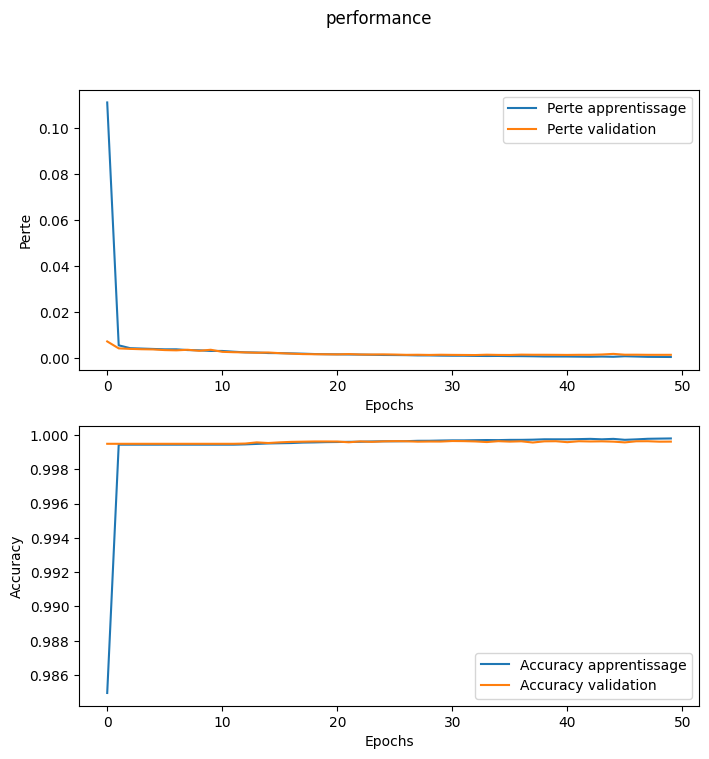

In [27]:
plt.figure(1, figsize=(8, 8))
plt.suptitle("performance") 
plt.subplot(2, 1, 1)
plt.plot(np.arange(0, 50), hist.history["loss"], label="Perte apprentissage")
plt.plot(np.arange(0, 50), hist.history["val_loss"], label="Perte validation")
plt.xlabel("Epochs")
plt.ylabel("Perte")
plt.legend() 
plt.subplot(2, 1, 2)
plt.plot(np.arange(0, 50), hist.history["accuracy"], label="Accuracy apprentissage")
plt.plot(np.arange(0, 50), hist.history["val_accuracy"], label="Accuracy validation") 
plt.xlabel("Epochs") 
plt.ylabel("Accuracy")
plt.legend()

plt.legend()


In [39]:

y_1 = model.predict(Xtest[50].reshape((1,512,512, 1)))

1/1 [==============================] - 0s 22ms/step


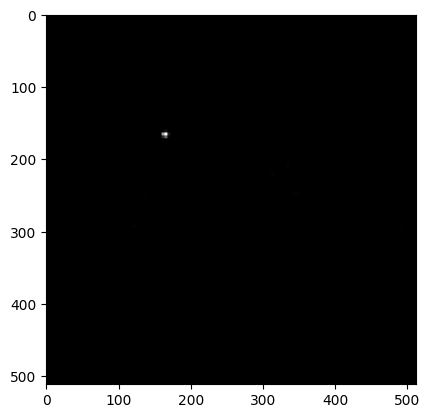

In [40]:
y_1 = y_1.reshape((512,512))
plt.imshow(y_1,cmap="gray")

In [41]:
y_1.max()

0.86968297

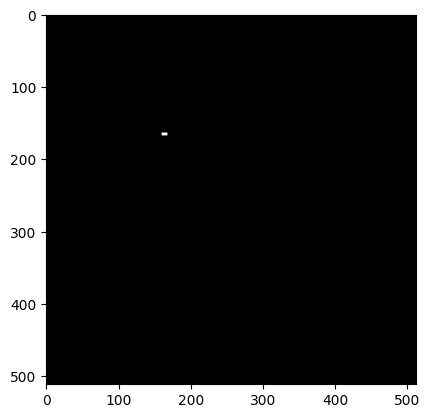

In [42]:
y_1 = np.where(y_1>0.5,1,0)
plt.imshow(y_1,cmap="gray")

In [43]:
y_1.max()

1

In [46]:

norm_img = Xtest[50].reshape((512,512))
img = norm_img * 255

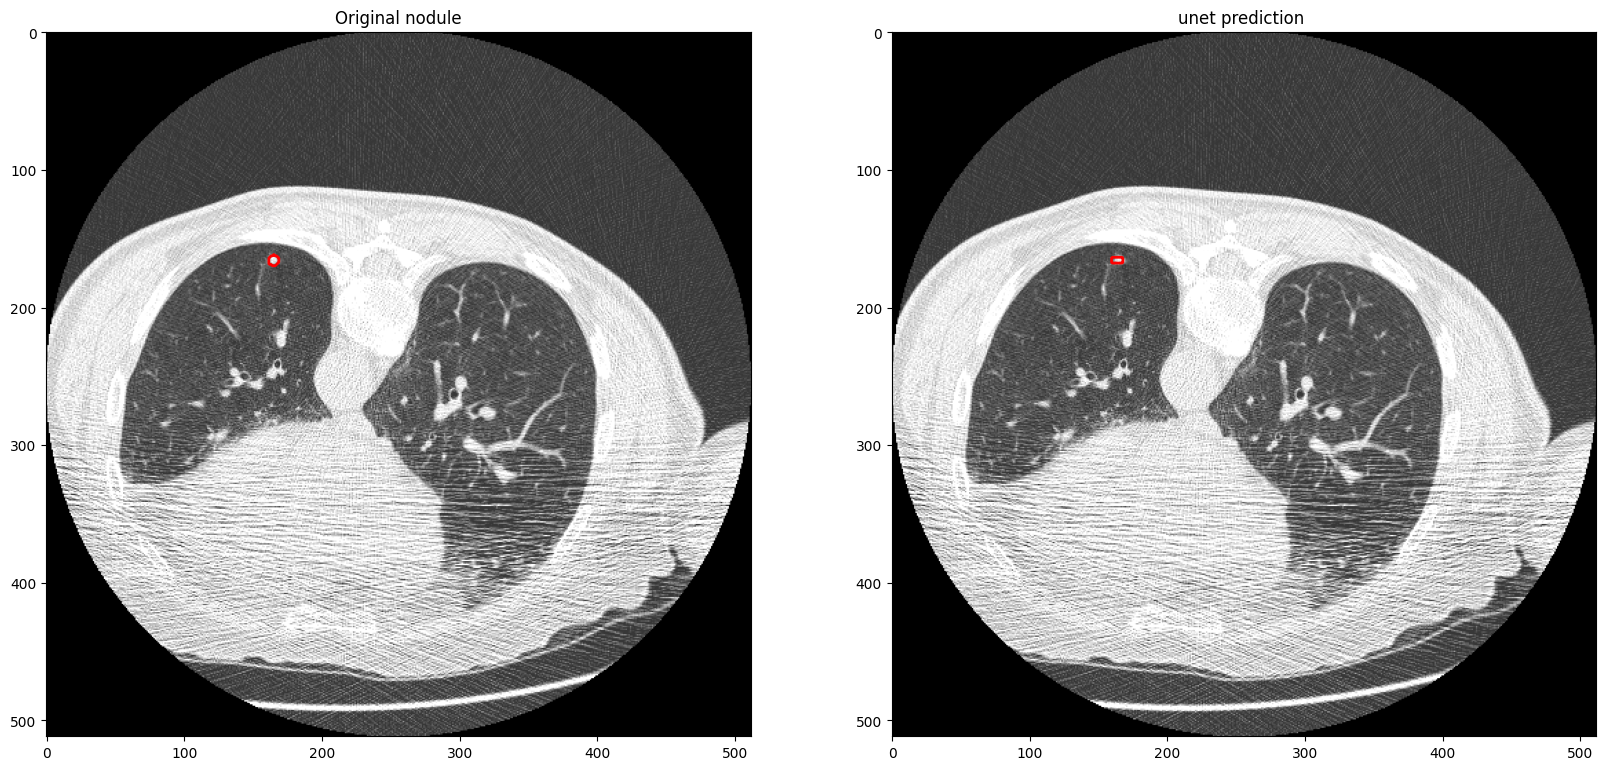

In [50]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(20, 20))
ax1.imshow(img,cmap="gray" )
ax1.set_title('Original nodule')
ax2.imshow(img,cmap='gray')
ax2.set_title('unet prediction ')
ax2.contour(y_1.reshape((512,512)), levels=[0.4], colors='r', linewidths=2)
ax1.contour(Ytest[50].reshape((512,512)), levels=[0.4], colors='r', linewidths=2)
plt.show()

In [51]:
import skimage.io
import skimage.measure
import numpy as np

# Load the mask image
mask = y_1

# Find the center and diameter of the circle
label_mask = skimage.measure.label(mask)
props = skimage.measure.regionprops(label_mask)
circle_props = max(props, key=lambda x: x.area)
center = circle_props.centroid
diameter = circle_props.equivalent_diameter

# Print the results
print('Center:', center)
print('Diameter:', diameter)

Center: (165.5, 163.5)
Diameter: 6.383076486422923


In [52]:
import skimage.io
import skimage.measure
import numpy as np

# Load the mask image
mask = Ytest[50].reshape((512,512))

# Find the center and diameter of the circle
label_mask = skimage.measure.label(mask)
props = skimage.measure.regionprops(label_mask)
circle_props = max(props, key=lambda x: x.area)
center = circle_props.centroid
diameter = circle_props.equivalent_diameter

# Print the results
print('Center:', center)
print('Diameter:', diameter)

Center: (165.72093023255815, 164.93023255813952)
Diameter: 7.399277020331919


In [55]:
model.save("deeplabv3plus.keras")